PyTorch provides two data primitives: 

torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

Things to know:

Batch Size: The number of training samples processed before the model’s weights are updated. Larger batch sizes can lead to more stable estimates of gradients but require more memory.

Epoch: One complete pass through the entire training dataset. Multiple epochs are used to train a model effectively.

Iteration: A single update step — that is, one batch passed through the model and gradients updated.

Iterations per epoch: total samples / batch size.

Test data: Data used to evaluate the final performance of the trained model. It should be independent of the training and validation datasets.

Training data: Data used to train the model, enabling it to learn patterns and make predictions.

This code downloads the training and test datasets from FashionMNIST, converting the images into tensors using ToTensor().
It then maps the dataset’s numeric labels (0–9) to human-readable names like "T-Shirt" and "Sneaker".
Next, it creates a figure and displays 9 randomly selected images from the training set along with their labels.
After that, it creates DataLoader objects for the training and test sets.
The DataLoader is iterable and automatically handles batching and shuffling of the data.
Finally, the code retrieves and displays the first image and its label from the first training batch.

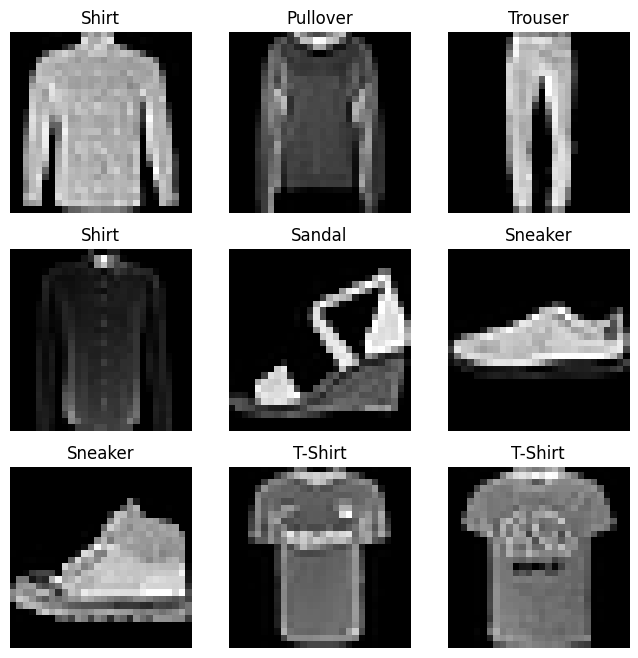

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


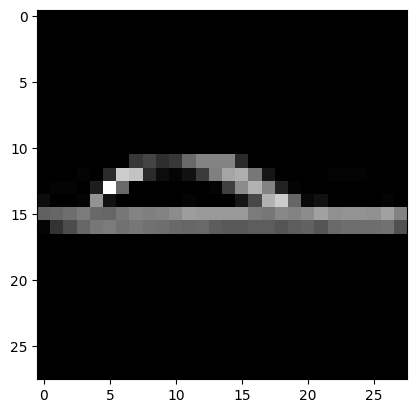

Label: 5


: 

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")